In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from urllib.request import urlretrieve
from utils.statistics import statistics, optimize_width, bar_chart_simple
from utils.io import get_anac_data

# Matplotlib confs
%matplotlib inline
matplotlib.style.use("seaborn-pastel")

In [2]:
# Carica i dati 2015, 2016, 2017
df_15 = get_anac_data('data/l190-2015.json', 'http://dati.anticorruzione.it/data/l190-2015.json')
df_16 = get_anac_data('data/l190-2016.json', 'http://dati.anticorruzione.it/data/l190-2016.json')
df_17 = get_anac_data('data/l190-2017.json', 'http://dati.anticorruzione.it/data/l190-2017.json')

# Aggiungi una colonna per la distinzione dell'anno
df_15['anno']=2015
df_16['anno']=2016
df_17['anno']=2017

# Unisci in un unico dataframe
df= df_15.append(df_16).append(df_17)

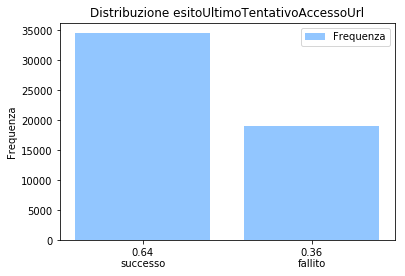

In [3]:
df_stats= statistics(df[['esitoUltimoTentativoAccessoUrl']])
for field in df_stats['Fields']:
    col = df[field].value_counts(dropna=False)
    titolo = "Distribuzione "+str(field)
    bar_chart_simple(col, titolo)

**Qual'è la natura delle comunicazioni fallite?** 

In [6]:
# Filtra su fallito
df=df[df['esitoUltimoTentativoAccessoUrl']=='fallito']
# Per visulizzazione definisci un nuovo campo che sia gli ultimi 20 caratteri di url
df['url2']=df['url'].str[-20:]

# Categorizza: (xml) Se url2 contiene .xml categorizza xml (xls) se url2 cotiene .xls (altro): default
df["ext"] = df["url2"].map(lambda x: "xml" if ".xml" in x else "xls" if ".xls" in x else "altro")
df.head()

,codiceFiscale,dataUltimoTentativoAccessoUrl,esitoUltimoTentativoAccessoUrl,identificativoPEC,ragioneSociale,url,anno,url2,ext
0,80003710789,2015-04-22T18:42:06.137+0000,fallito,opec275.20140526151617.31733.02.1.48@pec.aruba.it,AMMINISTRAZIONE PROVINCIALE DI COSENZA,http://servizi.provincia.cs.it/legge190/2013/i...,2015,3/indice_dataset.xml,xml
1,80015990544,2015-04-22T13:25:54.003+0000,fallito,opec275.20150112133830.12508.04.1.6@pec.actali...,DIREZIONE DIDATTICA DI CORCIANO,http://www.circolodidatticocorciano.gov.it/?pa...,2015,gov.it/?page_id=4142,altro
4,91011920179,2015-04-22T16:10:28.597+0000,fallito,opec275.20150109120653.25814.06.2.6@pec.actali...,"ISTITUTO ISTRUZIONE SUPERIORE "" C. MARZOLI """,http://www.istitutomarzoli.gov.it/datil190anno...,2015,nno2014/datil190.xml,xml
5,84002930018,2015-04-22T14:52:47.137+0000,fallito,1115440419.1497638899.1420806518417vliaspec03@...,COMUNE DI STRAMBINO,http://www.servizipubblicaamministrazione.it/s...,2015,l190/DataSetL190.xml,xml
7,81002610079,2015-04-22T14:23:01.193+0000,fallito,4AE7E700-7A62-20EF-37C0-70EAB5854745@telecompo...,COMUNE DI CHAMOIS,https://pdc.epublic.it/sec/PubTrasparenzaBusso...,2015,6f3d7bcfd6f0c07f2984,altro


In [7]:
# Fai le statistiche di esitoUltimoTentativoAccessoUrl e ext
df_stats= df[['esitoUltimoTentativoAccessoUrl', 'ext']]
df_stats= statistics(df[['esitoUltimoTentativoAccessoUrl', 'ext']])
df_stats

,Fields,Unique Row,% Unique,N° Missing,% Missing,Field Type,Max,Min,Mean,Var,Kurt
0,esitoUltimoTentativoAccessoUrl,1,0.000052,0,0.0,Categorical,0,0,0,0,0
1,ext,3,0.000157,0,0.0,Categorical,0,0,0,0,0


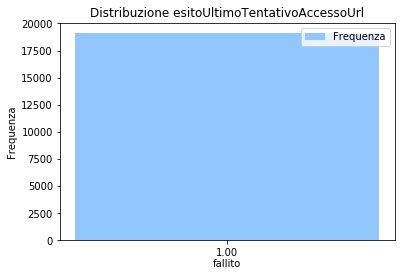

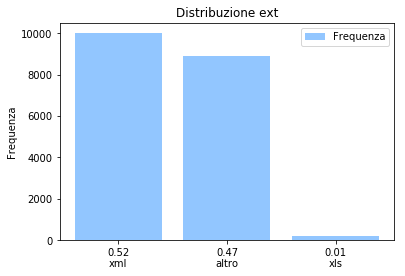

In [8]:
# Plotta     
for field in df_stats['Fields']:
    col = df[field].value_counts(dropna=False)
    titolo = "Distribuzione "+str(field)
    bar_chart_simple(col, titolo)

**Distribuzione dei formati delle sole comunicazione fallite:** una piccola percentuale è caratterizzata da xls, il 47% delle comunicazione fallite sono caratterizzate da xml con schema errato, il 52% delle comunicazioni errate è punta a pagine con una diversa estensione tipicamente pagine web.